In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Get the mean of the number of people who survived organized according to 'sex'
# Group the data according to gender and if they survived, and get a mean of it for all the columns
# Note: ALL COLUMNS THAT ARE NOT NUMERICAL WILL BE IGNORED
titanic.groupby(['sex', 'survived']).mean().unstack()

pclass                  age                sibsp            \
survived         0         1          0          1         0         1   
sex                                                                      
female    2.851852  1.918455  25.046875  28.847716  1.209877  0.515021   
male      2.476496  2.018349  31.618056  27.276022  0.440171  0.385321   

             parch                 fare            adult_male            \
survived         0         1          0          1          0         1   
sex                                                                       
female    1.037037  0.515021  23.024385  51.938573   0.000000  0.000000   
male      0.207265  0.357798  21.960993  40.821484   0.959402  0.807339   

             alone            
survived         0         1  
sex                           
female    0.333333  0.424893  
male      0.741453  0.587156

In [4]:
# Check the average 'fare' paid by the passengers organized according to the gender
titanic.groupby('sex')[['fare']].mean() 

,fare
sex,
female,44.479818
male,25.523893


In [5]:
# Check the average 'fare' paid by the passengers organized according to the gender
titanic.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [6]:
titanic.groupby(['sex', 'deck'])['survived'].mean().unstack()

deck,A,B,C,D,E,F,G
sex,,,,,,,
female,1.000000,1.0,0.888889,1.000000,0.933333,1.000,0.5
male,0.428571,0.4,0.343750,0.466667,0.588235,0.375,NaN


In [7]:
# Notice the data that we want to analyze here: the percentage of the people who
# survived organized according to 'sex' and the 'deck' they were allocated
# Note that by default the 'aggfunc' is set to mean. So we should see the mean number of 
# people who survived organized the way mentioned before
titanic.pivot_table('survived', index='sex', columns='deck')

deck,A,B,C,D,E,F,G
sex,,,,,,,
female,1.000000,1.0,0.888889,1.000000,0.933333,1.000,0.5
male,0.428571,0.4,0.343750,0.466667,0.588235,0.375,NaN


In [17]:
# Explicitly stating the aggregate function to 'mean'
titanic.pivot_table('survived', index='sex', columns='deck', aggfunc='mean')

deck,A,B,C,D,E,F,G
sex,,,,,,,
female,1.000000,1.0,0.888889,1.000000,0.933333,1.000,0.5
male,0.428571,0.4,0.343750,0.466667,0.588235,0.375,NaN


In [8]:
titanic.pivot_table('survived', index=['sex'], columns=['class', 'embark_town']).fillna('-')

class           First                           Second                         \
embark_town Cherbourg Queenstown Southampton Cherbourg Queenstown Southampton   
sex                                                                             
female       0.976744        1.0    0.958333       1.0        1.0    0.910448   
male         0.404762        0.0    0.354430       0.2        0.0    0.154639   

class           Third                         
embark_town Cherbourg Queenstown Southampton  
sex                                           
female       0.652174   0.727273    0.375000  
male         0.232558   0.076923    0.128302

In [15]:
fares = pd.cut(titanic['fare'], [50,100,150,200,250,300,350,400])
titanic.pivot_table('survived', index=['sex',fares], columns=['class'])

class                 First  Second     Third
sex    fare                                  
female (50, 100]   1.000000     1.0  0.000000
       (100, 150]  1.000000     NaN       NaN
       (150, 200]  0.714286     NaN       NaN
       (200, 250]  1.000000     NaN       NaN
       (250, 300]  1.000000     NaN       NaN
male   (50, 100]   0.394737     0.0  0.454545
       (100, 150]  0.444444     NaN       NaN
       (150, 200]  0.500000     NaN       NaN
       (200, 250]  0.000000     NaN       NaN
       (250, 300]  0.000000     NaN       NaN

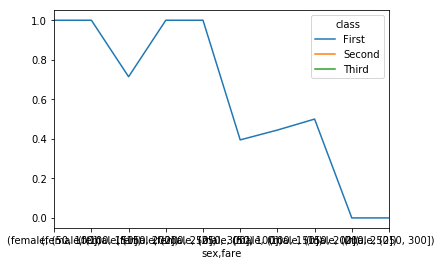

In [14]:
titanic.pivot_table('survived', index=['sex',fares], columns=['class']).plot()

In [10]:
fares = pd.qcut(titanic['fare'], 4) # Will arrange the fares in '4' levels
titanic.pivot_table('survived', index=['sex',fares], columns=['class'])

class                      First    Second     Third
sex    fare                                         
female (-0.001, 7.91]        NaN       NaN  0.697674
       (7.91, 14.454]        NaN  0.896552  0.447368
       (14.454, 31.0]   0.875000  0.921053  0.489362
       (31.0, 512.329]  0.976744  1.000000  0.125000
male   (-0.001, 7.91]   0.000000  0.000000  0.083333
       (7.91, 14.454]        NaN  0.122807  0.180000
       (14.454, 31.0]   0.465116  0.218750  0.166667
       (31.0, 512.329]  0.342466  0.230769  0.240000

In [11]:
# Apply different aggregate functions to different columns. Notice how the data 
# that is being analyzed ('survived' and 'fare') is passed via the 'aggfunc' variable
titanic.pivot_table(index=['sex', fares], columns=['class'], aggfunc={'survived': 'sum', 'fare': 'mean'})

fare                       survived             
class                        First     Second      Third    First Second Third
sex    fare                                                                   
female (-0.001, 7.91]          NaN        NaN   7.674619      NaN    NaN  30.0
       (7.91, 14.454]          NaN  12.293103  10.495511      NaN   26.0  17.0
       (14.454, 31.0]    27.765625  24.304495  19.741662      7.0   35.0  23.0
       (31.0, 512.329]  113.415116  43.295378  41.525781     84.0    9.0   2.0
male   (-0.001, 7.91]     0.833333   0.000000   7.342927      0.0    0.0  14.0
       (7.91, 14.454]          NaN  12.217325   8.747583      NaN    7.0  18.0
       (14.454, 31.0]    28.020151  24.004294  19.737193     20.0    7.0   9.0
       (31.0, 512.329]   95.777000  51.352892  48.776324     25.0    3.0   6.0

In [12]:
# Notice how turning the 'margins' value to 'True', the total of each row and column is 
# generated at the end sith the title, 'All'
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838
